To compare the memory usage of Dijkstra's and Prim's algorithms

In [2]:
!pip install memory-profiler

In [3]:
!pip install igraph

In [4]:
!pip install networkx

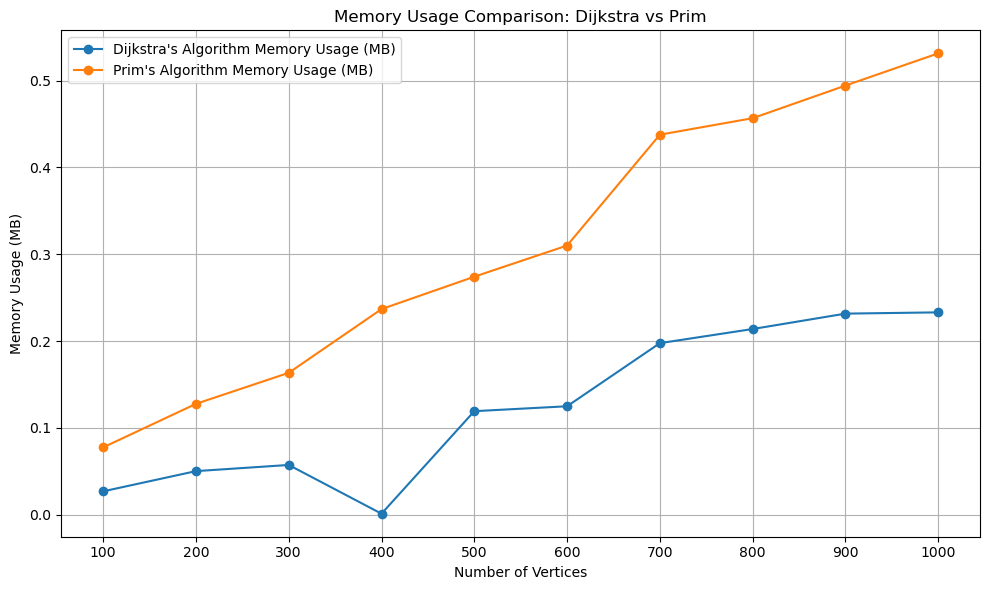

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tracemalloc

def measure_memory_usage(func, *args):
    tracemalloc.start()
    func(*args)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak / 10**6  # Convert to MB

def dijkstra_memory_usage(graph, start_node):
    # Using NetworkX's Dijkstra's algorithm for demonstration
    nx.single_source_dijkstra(graph, start_node)

def prim_memory_usage(graph):
    # Using NetworkX's Prim's algorithm for demonstration
    nx.minimum_spanning_tree(graph)

# Prepare data for graph sizes
vertex_counts = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
edges_counts = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

dijkstra_memory = []
prim_memory = []

for vertices, edges in zip(vertex_counts, edges_counts):
    # Create a random graph
    G = nx.gnm_random_graph(vertices, edges)

    # Measure Dijkstra's algorithm memory usage
    dijkstra_mem = measure_memory_usage(dijkstra_memory_usage, G, 0)
    dijkstra_memory.append(dijkstra_mem)

    # Measure Prim's algorithm memory usage
    prim_mem = measure_memory_usage(prim_memory_usage, G)
    prim_memory.append(prim_mem)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(vertex_counts, dijkstra_memory, label="Dijkstra's Algorithm Memory Usage (MB)", marker='o')
plt.plot(vertex_counts, prim_memory, label="Prim's Algorithm Memory Usage (MB)", marker='o')
plt.title('Memory Usage Comparison: Dijkstra vs Prim')
plt.xlabel('Number of Vertices')
plt.ylabel('Memory Usage (MB)')
plt.xticks(vertex_counts)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()